# Thinking 
今天讲解了时间序列预测的两种方式，实际上在数据库内建时间属性后，可以产生时序数据库，请思考什么是时序数据库？为什么时间序列数据成为增长最快的数据类型之一
答：时序数据库是指存储的数据具有时序特性，是根据时间来进行存储的，存储的数据表现了随着时间的发展各个字段属性不同的取值。时序数据成为增长最快的数据类型之一是因为，在预测领域中，往往需要通过带有时间特性的数据去进行模型训练，因为事物都是不断变化的，如果忽略时间因素，很有可能预测的结果与实际值相差甚远，比如推荐系统，用户的期望与他当前时间所处的环境有关，不能用他多年以前的购买行为或者阅读行为来预测现在的购买或者阅读，否则就会有非常不好的用户体验。


# Action

In [ ]:
import pandas as pd
import datetime as datetime
dataset=pd.read_csv('./raw.csv',parse_dates=[['year','month','day','hour']],index_col='year_month_day_hour')
dataset.drop('No',axis=1,inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 2010 1 1 0 to 2014 12 31 23
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   DEWP    43824 non-null  int64  
 2   TEMP    43824 non-null  float64
 3   PRES    43824 non-null  float64
 4   cbwd    43824 non-null  object 
 5   Iws     43824 non-null  float64
 6   Is      43824 non-null  int64  
 7   Ir      43824 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [7]:
dataset.isnull().sum()

pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [8]:
dataset

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010 1 1 0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010 1 1 1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010 1 1 2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010 1 1 3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010 1 1 4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014 12 31 19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014 12 31 20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014 12 31 21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [9]:
#对数据的列名进行重命名
dataset.columns=['pollution','dew','temp','press','wnd_dir','wnd_spd','snow','rain']
dataset.index.name='date'
dataset['pollution'].fillna(0,inplace=True)
dataset=dataset[24:]
dataset.to_csv('pollution.csv')

In [10]:
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010 1 2 0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010 1 2 1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010 1 2 2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010 1 2 3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010 1 2 4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014 12 31 19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014 12 31 20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014 12 31 21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [11]:
data=pd.read_csv('./pollution.csv',index_col=0)
values=data.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

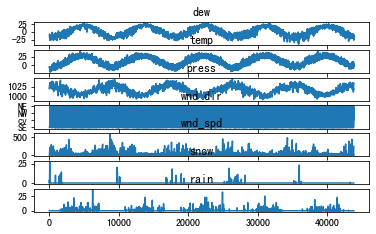

In [12]:
import matplotlib.pyplot as plt
for group in range(1,8):
    plt.subplot(8,1,group)
    plt.plot(values[:,group])
    plt.title(data.columns[group])
    group+=1
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
values[:,4]=encoder.fit_transform(values[:,4])
values=values.astype('float32')

In [14]:
#数据规范化
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(values)
scaled.shape

(43800, 8)

In [15]:
#构造输入数据和标签数据，t-1时刻的数据为输入参数，t时刻的pollution为输出标签
from pandas import DataFrame as df
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
    #数据索引号加i
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
    #数据索引号减i
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
data['wnd_dir'].value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

In [17]:
# 将时间序列数据转换为适合监督学习的数据
reframed = series_to_supervised(scaled, 1, 1)

reframed.to_csv('reframed-1.csv')
# 去掉不需要预测的列，即var2(t)	var3(t)	var4(t)	var5(t)	var6(t)	var7(t)	var8(t)
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.to_csv('reframed-2.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658
...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [18]:
values=reframed.values
n_train_hours=int(len(values)*0.8)
train=values[:n_train_hours,:]
test=values[n_train_hours:,:]
train_X,train_y=train[:,:-1],train[:,-1]
test_X,test_y=test[:,:-1],test[:,-1]


In [19]:
#转换成LSTM中需要的数据格式[样本数，时间步，特征数]
train_X=train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X=test_X.reshape((test_X.shape[0],1,test_X.shape[1]))


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model=Sequential()
#50个神经远的循环神经网络，输入为时间步和特征数
model.add(LSTM(50,input_shape=(train_X.shape[1],train_X.shape[2])))
#输出层为1
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
result=model.fit(train_X,train_y,epochs=10,batch_size=64,validation_data=(test_X,test_y),verbose=2,shuffle=False)

Epoch 1/10
548/548 - 5s - loss: 0.0035 - val_loss: 0.0099
Epoch 2/10
548/548 - 4s - loss: 9.3143e-04 - val_loss: 0.0038
Epoch 3/10
548/548 - 5s - loss: 8.2252e-04 - val_loss: 0.0022
Epoch 4/10
548/548 - 5s - loss: 8.0461e-04 - val_loss: 0.0017
Epoch 5/10
548/548 - 5s - loss: 8.0120e-04 - val_loss: 0.0015
Epoch 6/10
548/548 - 5s - loss: 8.0047e-04 - val_loss: 0.0013
Epoch 7/10
548/548 - 5s - loss: 8.0080e-04 - val_loss: 0.0012
Epoch 8/10
548/548 - 5s - loss: 8.0118e-04 - val_loss: 0.0011
Epoch 9/10
548/548 - 5s - loss: 8.0113e-04 - val_loss: 0.0011
Epoch 10/10
548/548 - 4s - loss: 8.0073e-04 - val_loss: 0.0011


In [30]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)

<function matplotlib.pyplot.show(*args, **kw)>

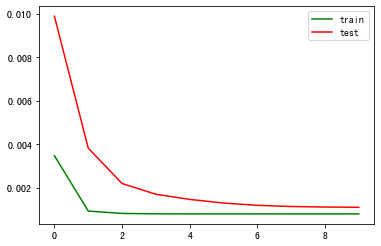

In [33]:
line1=result.history['loss']
line2=result.history['val_loss']
plt.plot(line1,label='train',c='g')
plt.plot(line2,label='test',c='r')
plt.legend(loc='best')
plt.show

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


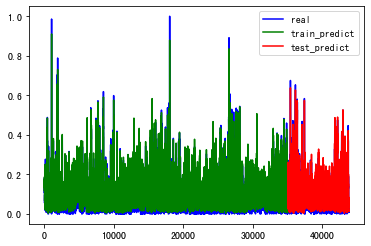

In [39]:
def plot_img(source_data_set,train_predict,test_predict):
    plt.plot(source_data_set[:,-1],label='real',c='b')
    plt.plot([x for x in train_predict],label='train_predict',c='g')
    plt.plot([None for _ in train_predict]+[x for x in test_predict],label='test_predict',c='r')
    plt.legend(loc='best')
    plt.show()
plot_img(values,train_predict,test_predict)

In [36]:
data

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010 1 2 0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010 1 2 1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010 1 2 2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010 1 2 3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010 1 2 4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014 12 31 19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014 12 31 20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014 12 31 21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
